# From which countries are the best cacao beans to make chocolate bars?

## BACKGROUND

You work at a specialty foods import company that wants to expand into gourmet chocolate bars. Your boss needs your team to research this market to inform your initial approach to potential suppliers. After finding valuable chocolate bar ratings online, you need to explore if the chocolate bars with the highest ratings share any characteristics that could help you narrow your search for suppliers (e.g., cacao percentage, bean country of origin, etc.)

## THE DATA

There is only dataset called *chocolate_bars*. This file contains information about chocolate bars. Next, we have the data dictionary: 

- "id" - id number of the review
- "manufacturer" - Name of the bar manufacturer
- "company_location" - Location of the manufacturer
- "year_reviewed" - From 2006 to 2021
- "bean_origin" - Country of origin of the cacao beans
- "bar_name" - Name of the chocolate bar
- "cocoa_percent" - Cocoa content of the bar (%)
- "num_ingredients" - Number of ingredients
- "ingredients" - B (Beans), S (Sugar), S* (Sweetener other than sugar or beet sugar), C (Cocoa Butter), (V) Vanilla, (L) Lecithin, (Sa) Salt
- "review" - Summary of most memorable characteristics of the chocolate bar
- "rating" - 1.0-1.9 Unpleasant, 2.0-2.9 Disappointing, 3.0-3.49 Recommended, 3.5-3.9 Highly Recommended, 4.0-5.0 Oustanding

## PROBLEM STATEMENT

Our goal for this project is to create a report that answers the following questions:

- What is the average rating by country of origin?
- How many bars were reviewed for each of those countries?
- Create plots to visualize findings for questions 1 and 2.
- Is the cacao bean's origin an indicator of quality?
- How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
- Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).

## LOAD PACKAGES AND DATAFRAMES

Let's start by loading all the necessary Python packages.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Using Pandas, we load CSV file into a DataFrame.

In [2]:
chocolate = pd.read_csv('data/chocolate_bars.csv')

We can check that the DataFrame was load correctly by verigying the first 5 rows.

In [3]:
chocolate.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


## EXPLORATORY DATA ANALYSIS

Before answering the questions of the project, it is necessary to know the structure of the data. To start we need to know how many observations the database has and the number of variables. The database has 2530 observations and has a total of 11 variables.

In [4]:
chocolate.shape

(2530, 11)

Continuing the analysis, it is necessary to check if there are missing values. It can be seen that there are missing values in the `num_ingredients` and `ingredients` columns.

In [5]:
chocolate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


There are 87 missing values for each column.

In [6]:
chocolate.isnull().sum()

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

Another critical step is to check if there are observations that are repeated in the database. There are no duplicate observations.

In [7]:
chocolate.duplicated().sum()

0

Finally, a statistical analysis of the numerical variables is carried out:
- **cocoa_percent**: minimum value is 42, maximum value is 100, all values are in a correct range.
- **num_ingredients**: minimum value is 1, maximum value is 16, all values are in a correct range.
- **rating**: minimum value is 1, maximum value is 4, all values are in a correct range. The data dictionary shows that the ratings can have a maximum value of 5, but according to statistical analysis, no chocolate bar has exceeded a rating of 4.

In [8]:
chocolate.loc[
    :,
    ['cocoa_percent', 'num_ingredients', 'rating']
].describe()

,cocoa_percent,num_ingredients,rating
count,2530.000000,2443.000000,2530.000000
mean,71.639723,3.041343,3.196344
std,5.616724,0.913728,0.445321
min,42.000000,1.000000,1.000000
25%,70.000000,2.000000,3.000000
50%,70.000000,3.000000,3.250000
75%,74.000000,4.000000,3.500000
max,100.000000,6.000000,4.000000


Now we are ready to answer the questions of the project.

## 1. What is the average rating by country of origin?

There are a total of 62 countries of origin. To carry out a more detailed analysis of this aspect, the countries of origin will be segmented by continent. This segmentation will help determine the average rating by continent, and within each continent the average of each country.

In [9]:
chocolate['bean_origin'].value_counts()

Venezuela                253
Peru                     244
Dominican Republic       226
Ecuador                  219
Madagascar               177
                        ... 
Sumatra                    1
St.Vincent-Grenadines      1
Martinique                 1
Burma                      1
DR Congo                   1
Name: bean_origin, Length: 62, dtype: int64

In [10]:
print(list(chocolate['bean_origin'].unique()))

['Tanzania', 'Dominican Republic', 'Madagascar', 'Fiji', 'Venezuela', 'Uganda', 'India', 'Bolivia', 'Peru', 'Panama', 'Colombia', 'Burma', 'Brazil', 'Papua New Guinea', 'Ecuador', 'Cuba', 'Togo', 'Sao Tome', 'Mexico', 'Vanuatu', 'Indonesia', 'Trinidad', 'Vietnam', 'Nicaragua', 'Ghana', 'Belize', 'Blend', 'Jamaica', 'Grenada', 'Guatemala', 'Honduras', 'Costa Rica', 'Haiti', 'Congo', 'Philippines', 'Solomon Islands', 'Malaysia', 'Sri Lanka', 'Ivory Coast', 'Gabon', 'Taiwan', 'Puerto Rico', 'Martinique', 'St. Lucia', 'Australia', 'Liberia', 'Sierra Leone', 'U.S.A.', 'Nigeria', 'St.Vincent-Grenadines', 'Thailand', 'Tobago', 'Sao Tome & Principe', 'Sumatra', 'El Salvador', 'Cameroon', 'Samoa', 'China', 'Principe', 'Sulawesi', 'Suriname', 'DR Congo']


In [11]:
continents = {'Asia':['India', 'Burma', 'Indonesia', 'Vietnam', 'Philippines', 'Malaysia', 'Sri Lanka',
                      'Ivory Coast', 'Gabon', 'Taiwan', 'Thailand', 'Sumatra', 'China', 'Sulawesi'], 
              'Africa':['Tanzania', 'Madagascar', 'Uganda', 'Togo', 'Sao Tome', 'Ghana', 'Congo',
                        'Liberia', 'Sierra Leone', 'Nigeria', 'Sao Tome & Principe', 'Cameroon',
                        'Principe', 'DR Congo'], 
              'North America':['Dominican Republic', 'Panama', 'Cuba', 'Mexico', 'Trinidad', 
                               'Nicaragua', 'Belize', 'Jamaica', 'Grenada', 'Guatemala', 'Honduras', 
                               'Costa Rica', 'Haiti', 'Puerto Rico', 'Martinique', 'St. Lucia', 
                               'U.S.A.', 'St.Vincent-Grenadines', 'Tobago', 'El Salvador'], 
              'South America':['Venezuela', 'Bolivia', 'Peru', 'Colombia', 'Brazil', 'Ecuador', 'Suriname'],
              'Oceania':['Fiji', 'Papua New Guinea', 'Vanuatu', 'Solomon Islands', 'Australia', 'Samoa', ]
             }

In [12]:
countries_map = {country: continent
                 for continent, countries in continents.items()
                 for country in countries}

In [13]:
chocolate = chocolate.assign(
    bean_continent = lambda x: x['bean_origin'].map(countries_map)
)

After segmenting the countries of origin by continent, it can be seen that there are 156 observations that could not be classified. Let's find out which country or countries could not be classified.

In [14]:
chocolate['bean_continent'].value_counts(dropna=False)

South America    954
North America    783
Africa           361
Asia             181
NaN              156
Oceania           95
Name: bean_continent, dtype: int64

**Blend** is a classification used by the World Bank to group certain among which are China, India, Pakistan, Nigeria and Egypt. Among the countries mentioned are countries from different continents, which is why we choose to eliminate all the observations that have *blend* as their country of origin.

In [15]:
chocolate_na = chocolate[chocolate['bean_continent'].isnull()]
chocolate_na['bean_origin'].value_counts()

Blend    156
Name: bean_origin, dtype: int64

All countries of origin are correctly segmented. Note that we now have a total of 2374 observations.

In [16]:
chocolate = chocolate[chocolate['bean_origin'] != 'Blend']
chocolate['bean_continent'].value_counts(dropna=False)

South America    954
North America    783
Africa           361
Asia             181
Oceania           95
Name: bean_continent, dtype: int64

Now we proceed to obtain the average rating by continent. The continent with the **highest average score is Oceania (3.23)**, while the continent with the **lowest average score is Asia (3.19)**.

In [17]:
chocolate.groupby('bean_continent')['rating'].mean().round(decimals=2).sort_values(ascending=False)

bean_continent
Oceania          3.23
Africa           3.21
North America    3.21
South America    3.20
Asia             3.19
Name: rating, dtype: float64

The countries of **Sao Tome & Principe, Congo, Madagascar and Tanzania have an average rating higher than the African average rating (3.21)**.

In [18]:
bean_africa = chocolate[chocolate['bean_continent'] == 'Africa']

In [19]:
bean_africa_average = bean_africa.groupby(by='bean_origin', as_index=False)['rating'].mean()
bean_africa_average.rename(columns={'bean_origin':'Country', 'rating':'Avg. Rating'}, inplace=True)
bean_africa_average.round(decimals=2).sort_values(by='Avg. Rating', ascending=False)

,Country,Avg. Rating
9,Sao Tome & Principe,3.50
1,Congo,3.32
5,Madagascar,3.27
11,Tanzania,3.23
3,Ghana,3.13
0,Cameroon,3.08
4,Liberia,3.08
12,Togo,3.08
8,Sao Tome,3.07
13,Uganda,3.07


With respect to Asian countries: **China, Thailand, Vietnam, Gabon, and Sulawesi have an average rating above the Asian average rating (3.19)**.

In [20]:
bean_asia = chocolate[chocolate['bean_continent'] == 'Asia']

In [21]:
bean_asia_average = bean_asia.groupby(by='bean_origin', as_index=False)['rating'].mean()
bean_asia_average.rename(columns={'bean_origin':'Country', 'rating':'Avg. Rating'}, inplace=True)
bean_asia_average.sort_values(by='Avg. Rating', ascending=False).round(decimals=2)

,Country,Avg. Rating
1,China,3.50
12,Thailand,3.30
13,Vietnam,3.29
2,Gabon,3.25
9,Sulawesi,3.25
3,India,3.16
7,Philippines,3.12
4,Indonesia,3.11
6,Malaysia,3.09
0,Burma,3.00


Among the countries of North America: **Tobago, Cuba, Haiti, Nicaragua, Guatemala, U.S.A., Honduras, Trinidad, Belize and the Dominican Republic exceed the North American average rating (3.21)**.

In [22]:
bean_north_america = chocolate[chocolate['bean_continent'] == 'North America']

In [23]:
bean_north_america_average = bean_north_america.groupby(by='bean_origin', as_index=False)['rating'].mean()
bean_north_america_average.rename(columns={'bean_origin':'Country', 'rating':'Avg. Rating'}, inplace=True)
bean_north_america_average.sort_values(by='Avg. Rating', ascending=False).round(decimals=2)

,Country,Avg. Rating
17,Tobago,3.62
2,Cuba,3.29
7,Haiti,3.27
6,Guatemala,3.26
12,Nicaragua,3.26
18,Trinidad,3.24
19,U.S.A.,3.24
8,Honduras,3.24
0,Belize,3.23
3,Dominican Republic,3.22


The Oceanian countries that **exceeded the average rating (3.23)** are: **Solomon Islands, Papua New Guinea and Australia**.

In [24]:
bean_oceania = chocolate[chocolate['bean_continent'] == 'Oceania']

In [25]:
bean_oceania_average = bean_oceania.groupby(by='bean_origin', as_index=False)['rating'].mean()
bean_oceania_average.rename(columns={'bean_origin':'Country', 'rating':'Avg. Rating'}, inplace=True)
bean_oceania_average.sort_values(by='Avg. Rating', ascending=False).round(decimals=2)

,Country,Avg. Rating
4,Solomon Islands,3.45
2,Papua New Guinea,3.28
0,Australia,3.25
5,Vanuatu,3.12
3,Samoa,3.08
1,Fiji,3.06


Finally, the countries that **exceeded the South American average rating (3.20)** are: **Brazil, Suriname and Venezuela**.

In [26]:
bean_south_america = chocolate[chocolate['bean_continent'] == 'South America']

In [27]:
bean_south_america_average = bean_south_america.groupby(by='bean_origin', as_index=False)['rating'].mean()
bean_south_america_average.rename(columns={'bean_origin':'Country', 'rating':'Avg. Rating'}, inplace=True)
bean_south_america_average.sort_values(by='Avg. Rating', ascending=False).round(decimals=2)

,Country,Avg. Rating
1,Brazil,3.26
5,Suriname,3.25
6,Venezuela,3.23
4,Peru,3.20
2,Colombia,3.20
0,Bolivia,3.18
3,Ecuador,3.16


## 2. How many bars were reviewed for each of those countries?

**South America is the continent with the highest number of chocolate bars reviewed** with a total of 954, followed by North America with a total of 783, Africa with 361, Asia with 181 and Oceania with 95.

In [28]:
bean_count_continent = chocolate.groupby(by='bean_continent', as_index=False)['rating'].count()
bean_count_continent.rename(columns={'bean_origin':'Continent', 'rating':'Count Review'}, inplace=True)
bean_count_continent.sort_values(by='Count Review', ascending=False)

,bean_continent,Count Review
4,South America,954
2,North America,783
0,Africa,361
1,Asia,181
3,Oceania,95


In the African continent, **Madagascar is the country with the highest number of chocolate bars reviewed (177)**, while **DR Congo and Principe are the countries with the fewest chocolate bars reviewed (1)**.

In [29]:
bean_africa_count = bean_africa.groupby(by='bean_origin', as_index=False)['rating'].count()
bean_africa_count.rename(columns={'bean_origin':'Country', 'rating':'Count Review'}, inplace=True)
bean_africa_count.sort_values(by='Count Review', ascending=False)

,Country,Count Review
5,Madagascar,177
11,Tanzania,79
3,Ghana,41
13,Uganda,19
8,Sao Tome,14
1,Congo,11
10,Sierra Leone,4
0,Cameroon,3
4,Liberia,3
6,Nigeria,3


In the case of the Asian continent, **the country with the highest count of chocolate bars reviewed is Vietnam with a total of 73**. On the other hand, **the countries with the lowest count of chocolate bars reviewed are Burma, China, Gabon, Sulawesi and Sumatra (1)**.

In [30]:
bean_asia_count = bean_asia.groupby(by='bean_origin', as_index=False)['rating'].count()
bean_asia_count.rename(columns={'bean_origin':'Country', 'rating':'Count Review'}, inplace=True)
bean_asia_count.sort_values(by='Count Review', ascending=False)

,Country,Count Review
13,Vietnam,73
3,India,35
7,Philippines,24
4,Indonesia,20
6,Malaysia,8
5,Ivory Coast,7
12,Thailand,5
8,Sri Lanka,2
11,Taiwan,2
0,Burma,1


Regarding the North American continent, **the Dominican Republic has the highest count of chocolate bars reviewed with a total of 226**. On the other hand, **St. Vincent-Grenadines and Martinique are the countries with the lowest count of chocolate bars reviewed, only 1 bars**.

In [31]:
bean_north_america_count = bean_north_america.groupby(by='bean_origin', as_index=False)['rating'].count()
bean_north_america_count.rename(columns={'bean_origin':'Country', 'rating':'Count Review'}, inplace=True)
bean_north_america_count.sort_values(by='Count Review', ascending=False)

,Country,Count Review
3,Dominican Republic,226
12,Nicaragua,100
0,Belize,76
6,Guatemala,62
11,Mexico,55
1,Costa Rica,43
18,Trinidad,42
19,U.S.A.,33
7,Haiti,30
8,Honduras,25


For the Oceanic continent, **Papua New Guinea is the country with the highest count of chocolate bars reviewed (50)**, while **Australia and Samoa have the lowest count of chocolate bars reviewed (3)**.

In [32]:
bean_oceania_count = bean_oceania.groupby(by='bean_origin', as_index=False)['rating'].count()
bean_oceania_count.rename(columns={'bean_origin':'Country', 'rating':'Count Review'}, inplace=True)
bean_oceania_count.sort_values(by='Count Review', ascending=False)

,Country,Count Review
2,Papua New Guinea,50
1,Fiji,16
5,Vanuatu,13
4,Solomon Islands,10
0,Australia,3
3,Samoa,3


Finally, in the South American continent **the country with the highest number of qualified chocolate bars is Venezuela (253)**. On the other hand, **Suriname is the country with the lowest count of chocolate bars reviewed (1)**.

In [33]:
bean_south_america_count = bean_south_america.groupby(by='bean_origin', as_index=False)['rating'].count()
bean_south_america_count.rename(columns={'bean_origin':'Country', 'rating':'Count Review'}, inplace=True)
bean_south_america_count.sort_values(by='Count Review', ascending=False)

,Country,Count Review
6,Venezuela,253
4,Peru,244
3,Ecuador,219
0,Bolivia,80
2,Colombia,79
1,Brazil,78
5,Suriname,1


## 3. Create plots to visualize findings for questions 1 and 2. 

### 3.1 Plots for average rating by country of origin

Below is the graph that shows the average rating by continent. The dots represent the respective averages for each continent, while the bars represent a 95% confidence interval. This means that the average could be found somewhere along the bar.

In [34]:
continent_order = ['Africa', 'Asia', 'North America', 'Oceania', 'South America']
country_colors = {'Africa':'#66c2a4', 'Asia':'#fd8d3c', 'North America':'#74a9cf', 
                  'Oceania':'#df65b0', 'South America':'#78c679'}

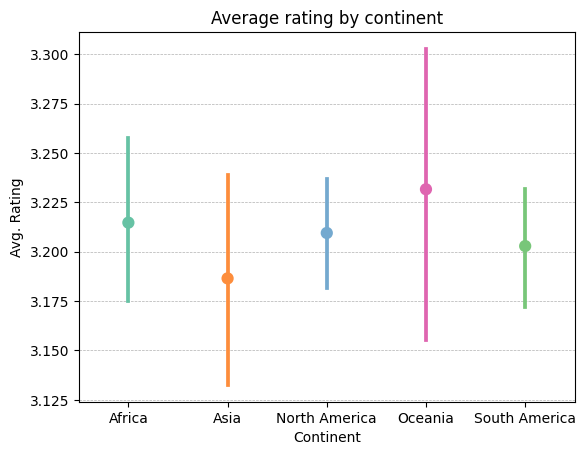

In [35]:
sns.pointplot(x='bean_continent', y='rating', data=chocolate, 
              palette=country_colors, order=continent_order)
plt.xlabel('Continent')
plt.ylabel('Avg. Rating')
plt.title('Average rating by continent')
plt.grid(axis = 'y', linestyle='--', linewidth=0.5)
plt.show()

Below there are graphs for all countries observed within each continent. Each graph has a segmented line that represents the average rating for that specific continent.

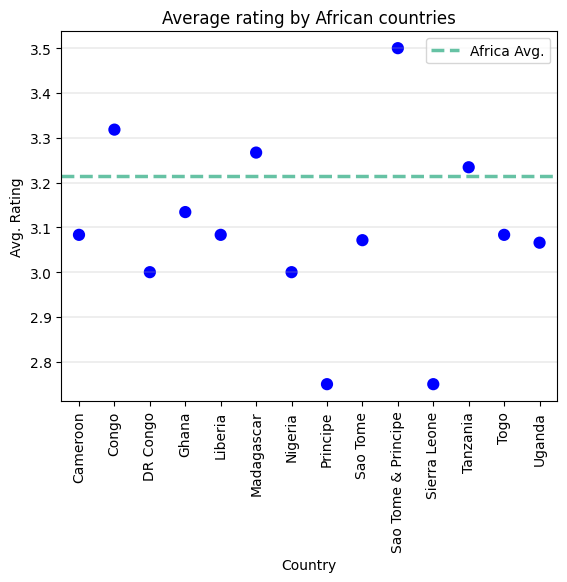

In [36]:
sns.pointplot(x='Country', y='Avg. Rating', data=bean_africa_average, join=False, color='blue')
plt.axhline(chocolate[chocolate['bean_continent'] == 'Africa'].rating.mean(), 
            color='#66c2a4', linestyle='dashed', label='Africa Avg.', linewidth=2.5)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Avg. Rating')
plt.title('Average rating by African countries')
plt.legend()
plt.grid(axis='y', linewidth=0.3)
plt.show()

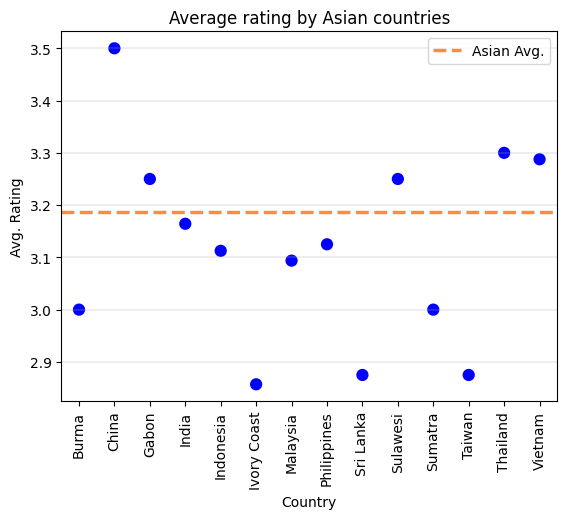

In [37]:
sns.pointplot(x='Country', y='Avg. Rating', data=bean_asia_average, join=False, color='blue')
plt.axhline(chocolate[chocolate['bean_continent'] == 'Asia'].rating.mean(), 
            color='#fd8d3c', linestyle='dashed', label='Asian Avg.', linewidth=2.5)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Avg. Rating')
plt.title('Average rating by Asian countries')
plt.legend()
plt.grid(axis='y', linewidth=0.3)
plt.show()

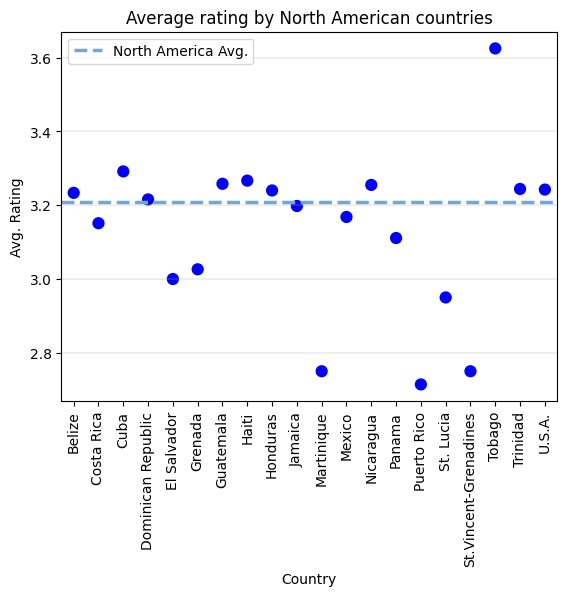

In [38]:
sns.pointplot(x='Country', y='Avg. Rating', data=bean_north_america_average, join=False, color='blue')
plt.axhline(chocolate[chocolate['bean_continent'] == 'North America'].rating.mean(), 
            color='#74a9cf', linestyle='dashed', label='North America Avg.', linewidth=2.5)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Avg. Rating')
plt.title('Average rating by North American countries')
plt.legend()
plt.grid(axis='y', linewidth=0.3)
plt.show()

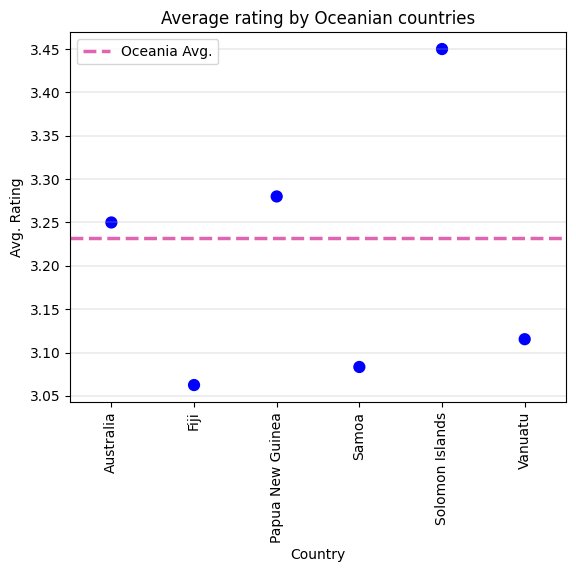

In [39]:
sns.pointplot(x='Country', y='Avg. Rating', data=bean_oceania_average, join=False, color='blue')
plt.axhline(chocolate[chocolate['bean_continent'] == 'Oceania'].rating.mean(), 
            color='#df65b0', linestyle='dashed', label='Oceania Avg.', linewidth=2.5)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Avg. Rating')
plt.title('Average rating by Oceanian countries')
plt.legend()
plt.grid(axis='y', linewidth=0.3)
plt.show()

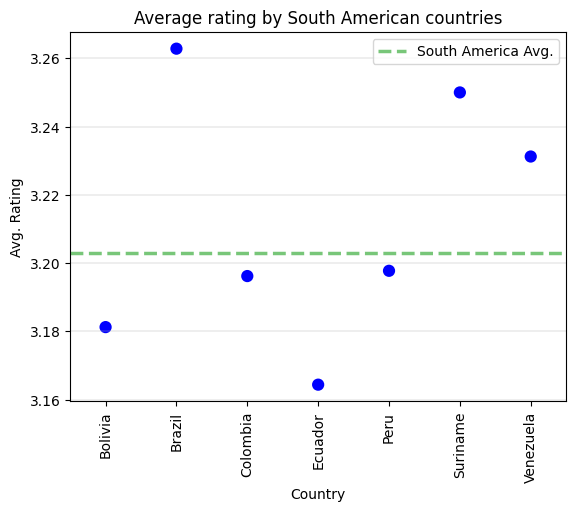

In [40]:
sns.pointplot(x='Country', y='Avg. Rating', data=bean_south_america_average, join=False, color='blue')
plt.axhline(chocolate[chocolate['bean_continent'] == 'South America'].rating.mean(), 
            color='#78c679', linestyle='dashed', label='South America Avg.', linewidth=2.5)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Avg. Rating')
plt.title('Average rating by South American countries')
plt.legend()
plt.grid(axis='y', linewidth=0.3)
plt.show()

### 3.2 Plots for count of reviewed by country of origin

The graphs below show the count of chocolate bars reviewed for each continent.

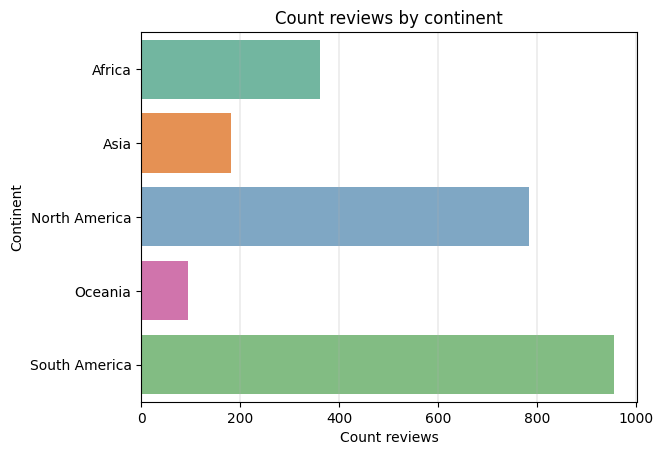

In [41]:
sns.barplot(y='bean_continent', x='Count Review', data=bean_count_continent, palette=country_colors)
plt.ylabel('Continent')
plt.xlabel('Count reviews')
plt.title('Count reviews by continent')
plt.grid(axis='x', linewidth=0.3)
plt.show()

The graphs below show the count of chocolate bars reviewed by country of origin on each continent.

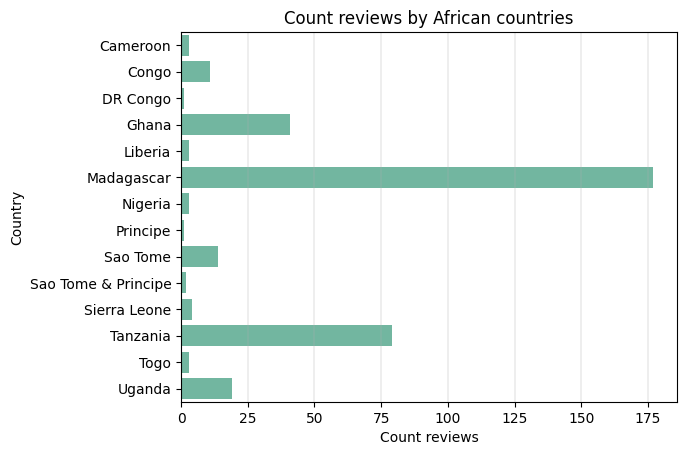

In [42]:
sns.barplot(y='Country', x='Count Review', data=bean_africa_count, color='#66c2a4')
plt.ylabel('Country')
plt.xlabel('Count reviews')
plt.title('Count reviews by African countries')
plt.grid(axis='x', linewidth=0.3)
plt.show()

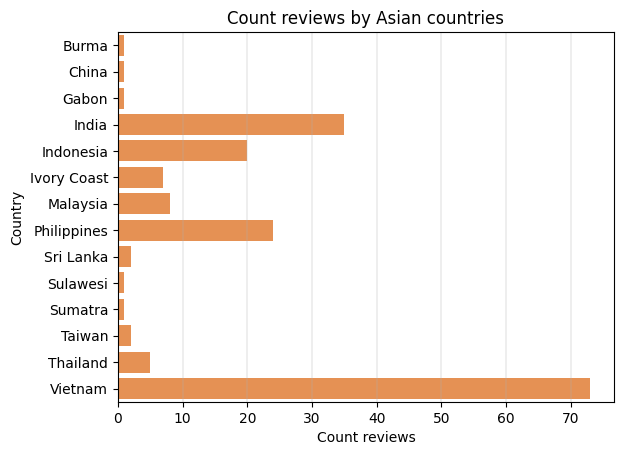

In [43]:
sns.barplot(y='Country', x='Count Review', data=bean_asia_count, color='#fd8d3c')
plt.ylabel('Country')
plt.xlabel('Count reviews')
plt.title('Count reviews by Asian countries')
plt.grid(axis='x', linewidth=0.3)
plt.show()

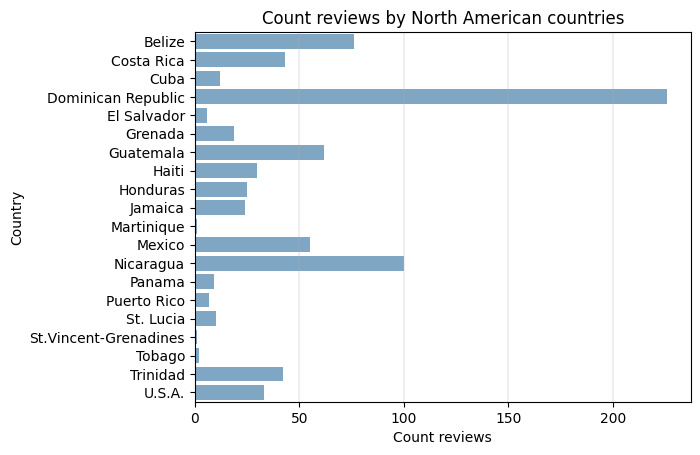

In [44]:
sns.barplot(y='Country', x='Count Review', data=bean_north_america_count, color='#74a9cf')
plt.ylabel('Country')
plt.xlabel('Count reviews')
plt.title('Count reviews by North American countries')
plt.grid(axis='x', linewidth=0.3)
plt.show()

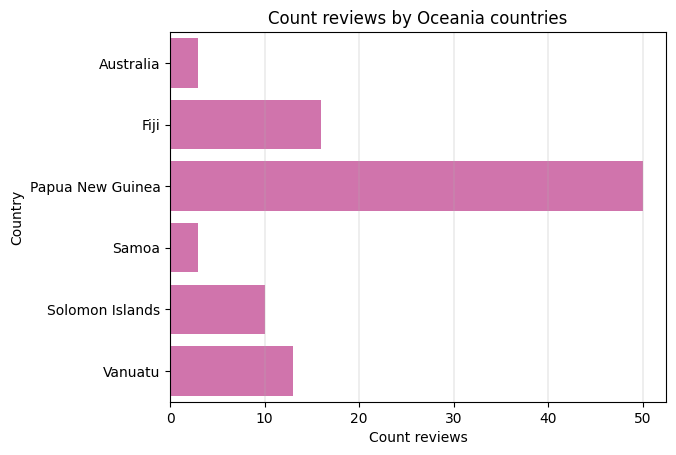

In [45]:
sns.barplot(y='Country', x='Count Review', data=bean_oceania_count, color='#df65b0')
plt.ylabel('Country')
plt.xlabel('Count reviews')
plt.title('Count reviews by Oceania countries')
plt.grid(axis='x', linewidth=0.3)
plt.show()

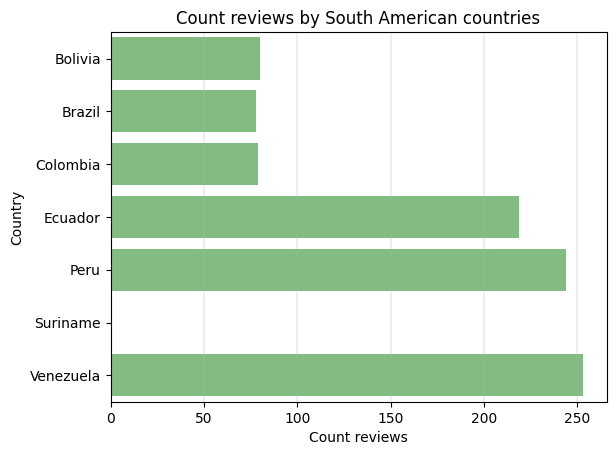

In [46]:
sns.barplot(y='Country', x='Count Review', data=bean_south_america_count, color='#78c679')
plt.ylabel('Country')
plt.xlabel('Count reviews')
plt.title('Count reviews by South American countries')
plt.grid(axis='x', linewidth=0.3)
plt.show()

## 4. Is the cacao bean's origin an indicator of quality?

To answer the question, it must be taken into account that in the database provided there is no variable that directly reflects the quality of the cocoa beans. However, the rating variable will be considered as a proxy indicator of the quality of the cacao beans. It means that the higher the rating, the higher its quality.

Taking this consideration into account, all those observations that had a rating greater than 3.5 will be considered. The reason this threshold was chosen is because when a brief statistical analysis of the numerical columns was done, the rating column showed that the 75th percentile was 3.5, indicating that the top 25% of the scores were are above 3.5.

Once these points have been clarified, the following table shows the top 10 countries with the highest percentage of ratings with respect to the total, ordered in descending order. It can be seen that the first 5 countries add up to a total of 54.52%, which means that more than half of the best scores for cacao beans were from these 5 countries. Therefore, it can be concluded that **the cacao bean's origin is an indicator of quality**.

In [47]:
chocolate_good_rating = chocolate[chocolate['rating'] > 3.5]

In [48]:
top_10 = chocolate_good_rating.value_counts(subset='bean_origin', normalize=True).nlargest(n=10) * 100
top_10.round(decimals=2)

bean_origin
Venezuela             14.73
Peru                  12.66
Dominican Republic    10.59
Ecuador                8.79
Madagascar             7.75
Nicaragua              4.13
Bolivia                3.88
Brazil                 3.62
Colombia               3.62
Tanzania               2.84
dtype: float64

## 5. How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?

To answer the first question, we have a column that shows whether the ingredients of the chocolate bar contain cocoa or not. Therefore, a new column will be created in the database that indicates whether or not the chocolate bar contains cocoa.

In [49]:
cocoa_content = {'B,S,C':'With cocoa',
                 'B,S':'Without cocoa',
                 'B,S,C,L':'With cocoa',
                 'B,S,C,V,L':'With cocoa',
                 'B,S,C,V':'With cocoa',
                 'B,S*':'Without cocoa',
                 'B,S*,C,Sa':'With cocoa',
                 'B,S*,C':'With cocoa',
                 'B,S,L':'Without cocoa',
                 'B,S,C,V,Sa':'With cocoa',
                 'B,S,C,Sa':'With cocoa',
                 'B':'Without cocoa',
                 'B,S*,C,V':'With cocoa',
                 'B,S,V,L':'Without cocoa',
                 'B,S,C,V,L,Sa':'With cocoa',
                 'B,S*,V,L':'Without cocoa',
                 'B,S*,C,L':'With cocoa',
                 'B,S,C,L,Sa':'With cocoa',
                 'B,C':'With cocoa',
                 'B,S*,Sa':'Without cocoa',
                 'B,S,V':'Without cocoa'
                }

In [50]:
chocolate = chocolate.assign(
    cocoa_content = lambda x: x['ingredients'].replace(cocoa_content)
)

The graph below shows the number of chocolate bars that do and do not contain cocoa. Of the total number of chocolate bars, 1,549 contain cocoa among their ingredients, while only 750 chocolate bars do not contain cocoa among their ingredients.

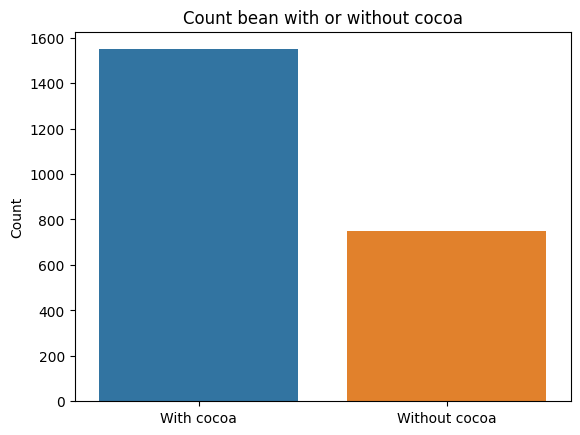

In [51]:
sns.countplot(x='cocoa_content', data=chocolate)
plt.ylabel('Count')
plt.xlabel('')
plt.title('Count bean with or without cocoa')
plt.show()

The following graph shows the average ratings for chocolate bars that contain cocoa versus those that do not contain cocoa. It can be seen that the chocolate bars that contain cocoa have a higher average rating (3.22) than those chocolate bars that do not contain cocoa (3.21). It can be concluded that **there is a relationship between the cocoa content in the chocolate bars and the ratings, if the chocolate bar contains cocoa, it has a higher rating on average**.

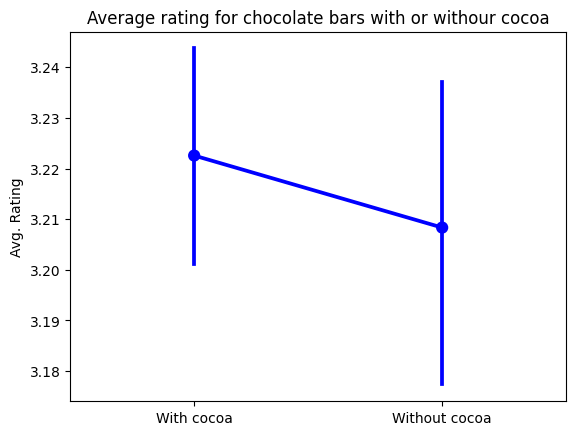

In [52]:
sns.pointplot(x='cocoa_content', y='rating', data=chocolate, color='blue')
plt.ylabel('Avg. Rating')
plt.xlabel('')
plt.title('Average rating for chocolate bars with or withour cocoa')
plt.show()

For the second question, **the average percentage of cocoa for chocolate bars with scores above 3.5 is 70.89%**.

In [53]:
chocolate_good_rating['cocoa_percent'].mean().round(2)

70.89

## 6. Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).

Before answer the question, we need to create a new column that indicates whether or not the chocolate bar contains lecithin.

In [54]:
lecithin_content = {'B,S,C':'Without lecithin',
                 'B,S':'Without lecithin',
                 'B,S,C,L':'With lecithin',
                 'B,S,C,V,L':'With lecithin',
                 'B,S,C,V':'Without lecithin',
                 'B,S*':'Without lecithin',
                 'B,S*,C,Sa':'Without lecithin',
                 'B,S*,C':'Without lecithin',
                 'B,S,L':'With lecithin',
                 'B,S,C,V,Sa':'Without lecithin',
                 'B,S,C,Sa':'Without lecithin',
                 'B':'Without lecithin',
                 'B,S*,C,V':'Without lecithin',
                 'B,S,V,L':'With lecithin',
                 'B,S,C,V,L,Sa':'With lecithin',
                 'B,S*,V,L':'With lecithin',
                 'B,S*,C,L':'With lecithin',
                 'B,S,C,L,Sa':'With lecithin',
                 'B,C':'Without lecithin',
                 'B,S*,Sa':'Without lecithin',
                 'B,S,V':'Without lecithin'
                }

In [55]:
chocolate = chocolate.assign(
    lecithin_content = lambda x: x['ingredients'].replace(lecithin_content)
)

The following graph shows that there are 430 chocolate bars that have lecithin among their ingredients, while 1869 bars do not contain lecithin among their ingredients.

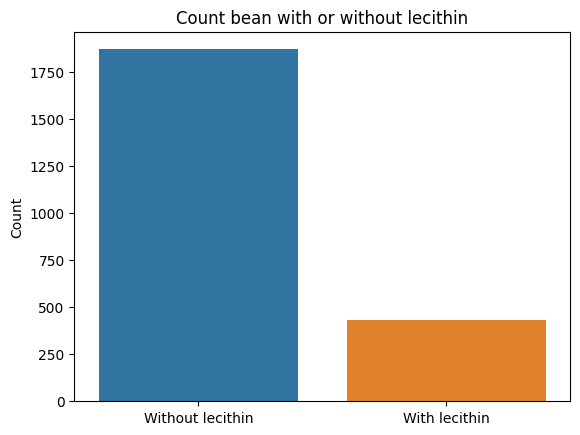

In [56]:
sns.countplot(x='lecithin_content', data=chocolate)
plt.ylabel('Count')
plt.xlabel('')
plt.title('Count bean with or without lecithin')
plt.show()

Finally, the graph below shows the average rating for bars that contain lecithin and those that do not contain lecithin. The average rating for chocolate bars that do not contain lecithin is higher (3.22), than those chocolate bars that contain lecithin (3.18). Therefore, it can be concluded that **the chocolate bars that do not contain lecithin have, on average, a higher rating than the chocolate bars that do have lecithin**.

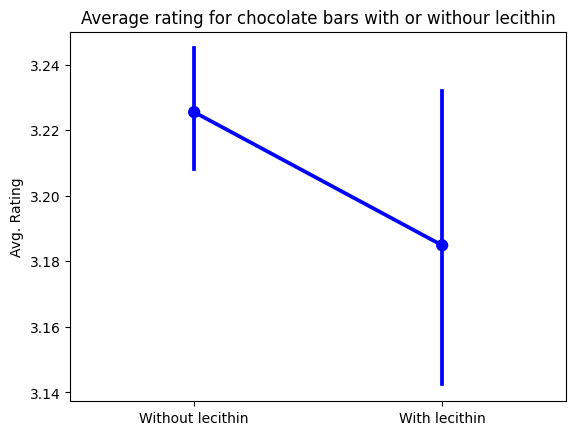

In [57]:
sns.pointplot(x='lecithin_content', y='rating', data=chocolate, color='blue')
plt.ylabel('Avg. Rating')
plt.xlabel('')
plt.title('Average rating for chocolate bars with or withour lecithin')
plt.show()

## FINDINGS

1. By one hand, the top 5 average rating countries of origin are: Tobago, China, Sao Tome & Principe, Solomon Islands and Congo, but these countries are between the lowest count of reviewed. By the other hand, **the top 5 count of reviewed countries are: Venezuela, Peru, Dominican Republic, Ecuador and Madagascar.** 
2. **Cacao bean's origin from Venezuela, Peru, Dominican Republic, Ecuador and Madagascar have the highest rating**. So cacao bean's origin seems to be and indicator of quality.
3. There is a relationship between the cocoa content in the chocolate bars and the ratings. This means that **if the chocolate bar contains cocoa, it has a higher rating on average.** And **most best rating chocolate bars have on average between 70 and 71 percentage of cocoa content.**
4. **The chocolate bars that do not contain lecithin have, on average, a higher rating** than the chocolate bars that do have lecithin.

**Thank you for reading this report!**